In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #import the tools
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
test_id = df_test["PassengerId"]

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:

def clean(data):
    
    data = data.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
    
    cols = ['SibSp', 'Parch', 'Age', 'Fare']
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True)
    data.Embarked.fillna('C', inplace = True)
    return data
df_train = clean(df_train)
df_test = clean(df_test)
df_test = df_test.drop('PassengerId', axis=1)

df_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df_new2 = pd.DataFrame(df_train.columns)   
cols = df_new2[0].tolist()

#check the unique value.
def unique_detector (data, cols):
    uni_counter = 0    #set a int for count how many time the loop execute.
    Nonuni_counter = 0
    colsDict = {}   #create a dictionary to contain the columns' name
    for y in cols:  #start a loop to count cols.
      checker = 0   #set a int to count how many unique item in a column.
      uni_counter += 1
      colsDict[y] = []          #creat a key based on the column name
      for x in data[y]:                    #start a loop to count items
        if x not in colsDict[y]:
          colsDict[y].append(x) #insert the items into the list
          checker = checker + 1
          if checker >= 10:           #only accept the column that has less than 10 unique items
            colsDict[y] = ["too many unique values"]     #otherwise print this warning
            Nonuni_counter += 1
            break               #jump to the next column
    print('------------------------------summary--------------------------------')
    print('Number of columns with less than 10 unique values: %.0f' % uni_counter)
    print('Number of columns with more than 10 unique values: %.0f' % Nonuni_counter)
    print('------------------------------columns details--------------------------------')
    for y in colsDict:
        print(y)
        print(colsDict[y])     #print each item in the dict.
        print('-------------------------')

unique_detector(df_train, cols) 

------------------------------summary--------------------------------
Number of columns with less than 10 unique values: 9
Number of columns with more than 10 unique values: 3
------------------------------columns details--------------------------------
PassengerId
['too many unique values']
-------------------------
Survived
[0, 1]
-------------------------
Pclass
[3, 1, 2]
-------------------------
Sex
['male', 'female']
-------------------------
Age
['too many unique values']
-------------------------
SibSp
[1, 0, 3, 4, 2, 5, 8]
-------------------------
Parch
[0, 1, 2, 5, 3, 4, 6]
-------------------------
Fare
['too many unique values']
-------------------------
Embarked
['S', 'C', 'Q']
-------------------------


In [ ]:
# https://stackoverflow.com/questions/2582138/finding-and-replacing-elements-in-a-list
col = df_train.Pclass.tolist() # Put the Pclass into the list and transform the value.
for n, i in enumerate(col):
    if i == 1:
        col[n] = '1st'
    elif i == 2:
        col[n] = '2nd'
    else:
        col[n] = '3rd'
col

['3rd',
 '1st',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '2nd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '3rd',
 '2nd',
 '3rd',
 '2nd',
 '3rd',
 '3rd',
 '2nd',
 '2nd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '1st',
 '1st',
 '3rd',
 '2nd',
 '1st',
 '1st',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '2nd',
 '3rd',
 '2nd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '1st',
 '2nd',
 '1st',
 '1st',
 '2nd',
 '3rd',
 '2nd',
 '3rd',
 '3rd',
 '1st',
 '1st',
 '3rd',
 '1st',
 '3rd',
 '2nd',
 '3rd',
 '3rd',
 '3rd',
 '2nd',
 '3rd',
 '2nd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '2nd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '1st',
 '2nd',
 '3rd',
 '3rd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '3rd',
 '1st',
 '1st',
 '2nd',
 '2nd',
 '3rd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '1st',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '3rd',
 '2nd',
 '1st',
 '3rd',
 '2nd',
 '3rd',
 '2nd',
 '2nd',
 '1st',


In [ ]:
df_train['Pclass'] = col # Put the columne back.
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3rd,male,22.0,1,0,7.2500,S
1,2,1,1st,female,38.0,1,0,71.2833,C
2,3,1,3rd,female,26.0,0,0,7.9250,S
3,4,1,1st,female,35.0,1,0,53.1000,S
4,5,0,3rd,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2nd,male,27.0,0,0,13.0000,S
887,888,1,1st,female,19.0,0,0,30.0000,S
888,889,0,3rd,female,28.0,1,2,23.4500,S
889,890,1,1st,male,26.0,0,0,30.0000,C


In [ ]:
# Create the dummy for Pclass and Embarked.
dumcol = pd.get_dummies(df_train[['Pclass', 'Embarked']], drop_first=True)
dumcol

,Pclass_2nd,Pclass_3rd,Embarked_Q,Embarked_S
0,0,1,0,1
1,0,0,0,0
2,0,1,0,1
3,0,0,0,1
4,0,1,0,1
...,...,...,...,...
886,1,0,0,1
887,0,0,0,1
888,0,1,0,1
889,0,0,0,0


In [ ]:
#  Put the dumcol and df_train together, we can also use for loop and pd.assign to automatic the code.
df_train['Pclass_2nd'] = dumcol['Pclass_2nd']
df_train['Pclass_3rd'] = dumcol['Pclass_3rd']
df_train['Embarked_Q'] = dumcol['Embarked_Q']
df_train['Embarked_S'] = dumcol['Embarked_S']
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2nd,Pclass_3rd,Embarked_Q,Embarked_S
0,1,0,3rd,male,22.0,1,0,7.2500,S,0,1,0,1
1,2,1,1st,female,38.0,1,0,71.2833,C,0,0,0,0
2,3,1,3rd,female,26.0,0,0,7.9250,S,0,1,0,1
3,4,1,1st,female,35.0,1,0,53.1000,S,0,0,0,1
4,5,0,3rd,male,35.0,0,0,8.0500,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2nd,male,27.0,0,0,13.0000,S,1,0,0,1
887,888,1,1st,female,19.0,0,0,30.0000,S,0,0,0,1
888,889,0,3rd,female,28.0,1,2,23.4500,S,0,1,0,1
889,890,1,1st,male,26.0,0,0,30.0000,C,0,0,0,0


In [ ]:
del df_train['Pclass']
del df_train['Embarked']
del df_train['PassengerId']
df_train

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2nd,Pclass_3rd,Embarked_Q,Embarked_S
0,0,male,22.0,1,0,7.2500,0,1,0,1
1,1,female,38.0,1,0,71.2833,0,0,0,0
2,1,female,26.0,0,0,7.9250,0,1,0,1
3,1,female,35.0,1,0,53.1000,0,0,0,1
4,0,male,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,1,0,0,1
887,1,female,19.0,0,0,30.0000,0,0,0,1
888,0,female,28.0,1,2,23.4500,0,1,0,1
889,1,male,26.0,0,0,30.0000,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex']
for col in cols:
    df_train[col] = le.fit_transform(df_train[col])

df_train

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2nd,Pclass_3rd,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,1,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,0,1
888,0,0,28.0,1,2,23.4500,0,1,0,1
889,1,1,26.0,0,0,30.0000,0,0,0,0


In [ ]:
# Using PCA to improve the performance.
from sklearn.preprocessing import StandardScaler

df_new2 = pd.DataFrame(df_train.columns)   
cols = df_new2[0].tolist()
data = []
for i in cols:
    data.append(i)
del data[0]
print(data)

# Separating out the features
x = df_train.loc[:, data].values
# Separating out the target
y = df_train.loc[:,['Survived']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

X

['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2nd', 'Pclass_3rd', 'Embarked_Q', 'Embarked_S']


array([[ 0.73769513, -0.56573646,  0.43279337, ...,  0.90258736,
        -0.30756234,  0.61930636],
       [-1.35557354,  0.66386103,  0.43279337, ..., -1.10792599,
        -0.30756234, -1.61470971],
       [-1.35557354, -0.25833709, -0.4745452 , ...,  0.90258736,
        -0.30756234,  0.61930636],
       ...,
       [-1.35557354, -0.1046374 ,  0.43279337, ...,  0.90258736,
        -0.30756234,  0.61930636],
       [ 0.73769513, -0.25833709, -0.4745452 , ..., -1.10792599,
        -0.30756234, -1.61470971],
       [ 0.73769513,  0.20276197, -0.4745452 , ...,  0.90258736,
         3.25137334, -1.61470971]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])

print(abs(principalDf))
print(pca.components_)

          pc1       pc2       pc3  ...       pc7       pc8       pc9
0    0.922062  0.186409  1.323274  ...  0.425508  0.031634  0.039577
1    0.650000  0.590719  2.038535  ...  0.878608  1.104311  0.356961
2    0.590625  0.014122  0.506445  ...  0.486770  0.111403  0.176657
3    1.073972  0.393007  0.428681  ...  1.167510  0.231907  0.770119
4    0.707641  1.003748  0.871091  ...  0.048385  0.106297  0.235759
..        ...       ...       ...  ...       ...       ...       ...
886  1.586628  1.272863  0.570526  ...  0.175728  0.173676  0.123951
887  0.668797  0.151213  0.075009  ...  0.505107  0.325297  1.128327
888  0.188664  1.955511  0.774137  ...  0.720634  0.010792  0.092425
889  0.064206  0.632228  1.074945  ...  0.355004  1.124414  0.865984
890  2.806786  0.727451  2.007122  ...  0.298202  0.861728  0.035566

[891 rows x 9 columns]
[[-0.1268442   0.21362352  0.00419153  0.10960488  0.29821075  0.46717547
  -0.61765018 -0.41183395  0.26069757]
 [-0.3651512  -0.32685057  0.546562

In [ ]:
finalDf = pd.concat([principalDf, df_train[['Survived']]], axis = 1)

finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,Survived
0,-0.922062,-0.186409,-1.323274,0.349443,0.240742,0.285905,-0.425508,0.031634,0.039577,0
1,0.650000,0.590719,2.038535,0.389777,-0.502819,0.219152,-0.878608,-1.104311,-0.356961,1
2,-0.590625,-0.014122,-0.506445,-0.229110,-1.785766,0.135545,-0.486770,0.111403,0.176657,1
3,1.073972,0.393007,0.428681,0.317375,-0.985470,-0.080369,-1.167510,0.231907,-0.770119,1
4,-0.707641,-1.003748,-0.871091,0.725492,-0.236577,-0.229117,0.048385,0.106297,0.235759,0
...,...,...,...,...,...,...,...,...,...,...
886,1.586628,-1.272863,-0.570526,-1.185586,0.826321,0.310384,0.175728,0.173676,0.123951,0
887,0.668797,0.151213,0.075009,-0.410664,-1.337417,0.906579,-0.505107,0.325297,-1.128327,1
888,-0.188664,1.955511,-0.774137,0.000003,-1.308582,-0.978013,0.720634,0.010792,0.092425,0
889,-0.064206,-0.632228,1.074945,0.292446,0.686968,0.997519,0.355004,-1.124414,-0.865984,1


(-2.3689471576081207, 5.721832944687286)

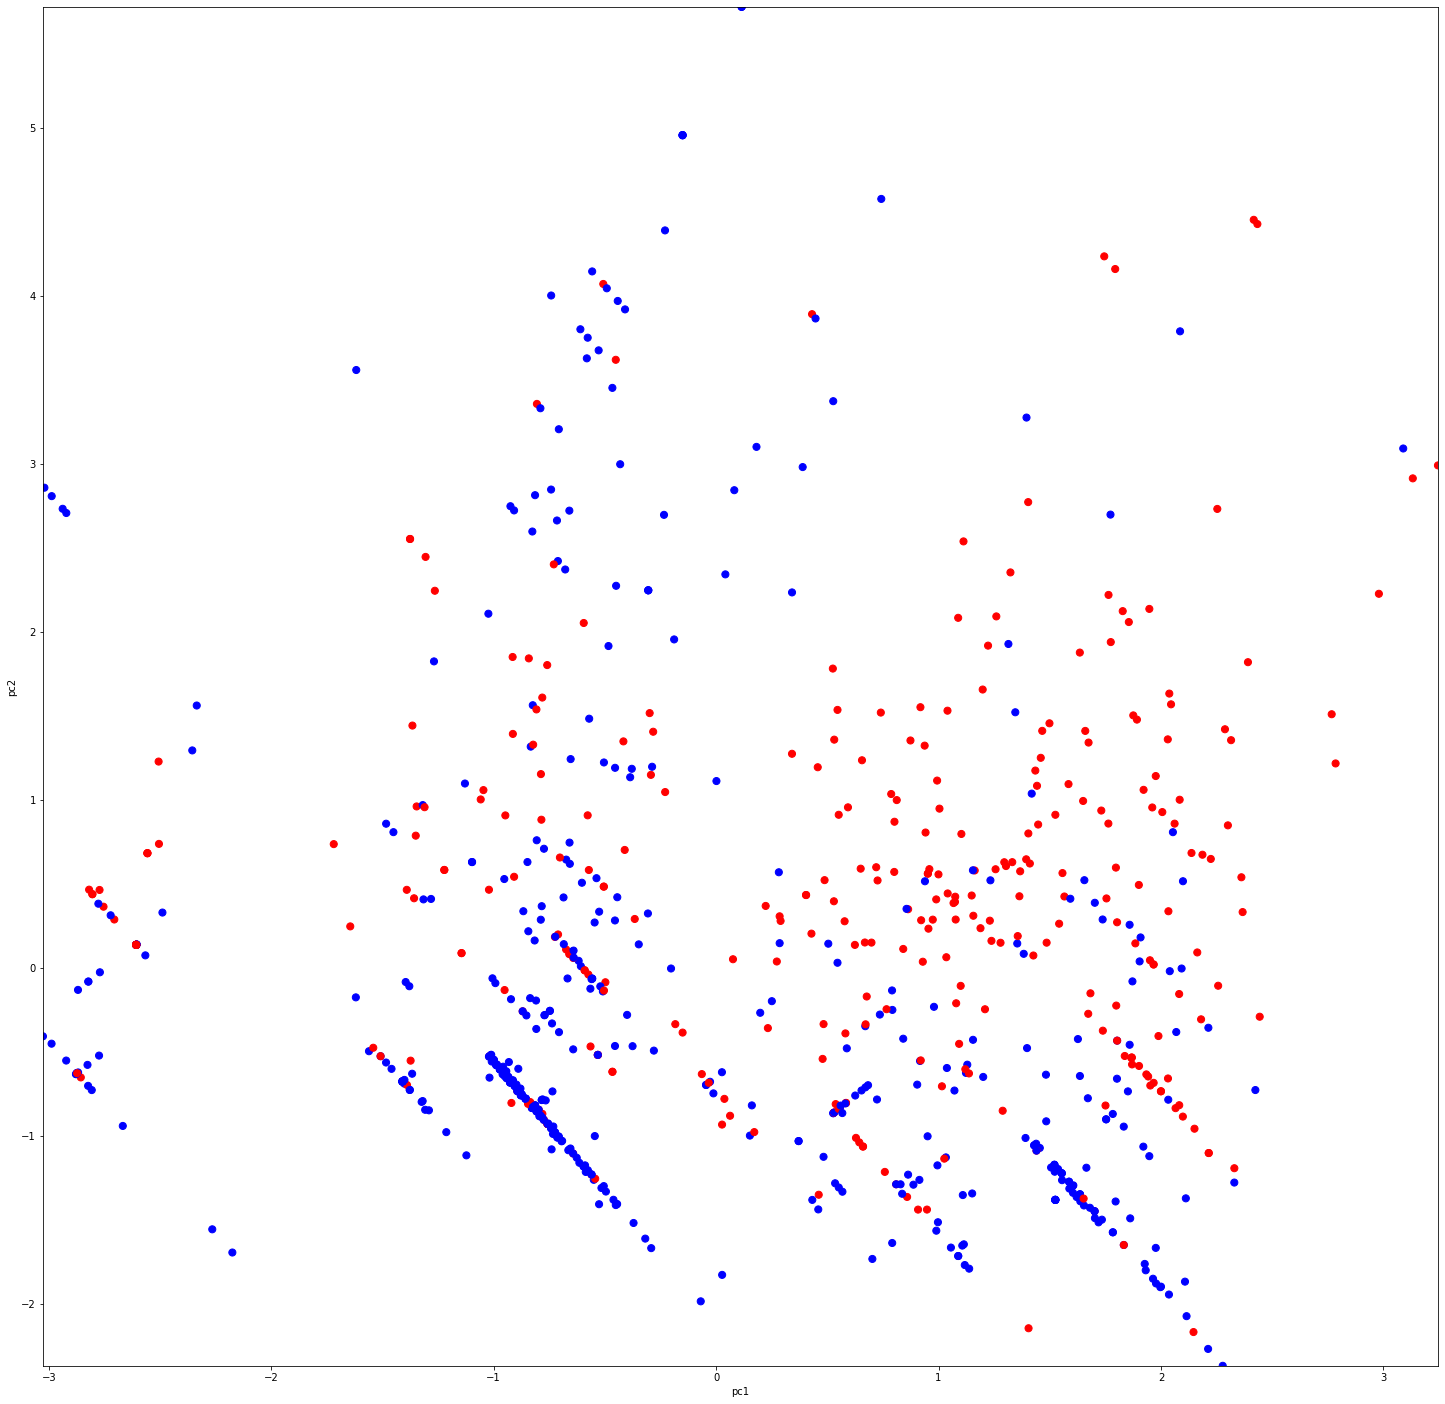

In [ ]:
import matplotlib.pylab as plt

%matplotlib inline

plt.figure(figsize=[25,25])
    
# Color
color = ["blue" if x == 0 else "red" for x in finalDf['Survived']]
    
# Plot and label
plt.scatter(finalDf['pc1'], finalDf['pc2'], c=color, s=50)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.xlim([min(finalDf['pc1'] ) , max(finalDf['pc1'] ) ])
plt.ylim([min(finalDf['pc2'] ) , max(finalDf['pc2'] ) ])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y = finalDf['Survived']
X = finalDf.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 24)

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("model score: %.10f" % clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

model score: 0.8379888268
0.8379888268156425


<Figure size 432x288 with 0 Axes>

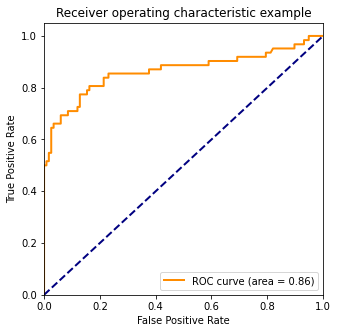

In [ ]:
#calculate the accuracy of the prediction using roc curve.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = clf.decision_function(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr,tpr) ###計算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率為橫座標，真正率為縱座標做曲線
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #draw a line from (0, 0) to (1, 1). The first braket means
                                                            # x-asis from 0 to 1 and so on.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, hidden_layer_sizes=(100, 10), random_state=89,
                   max_iter=10000, verbose=10, learning_rate_init=0.0001)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.76559596
Iteration 2, loss = 0.75953380
Iteration 3, loss = 0.75396389
Iteration 4, loss = 0.74832075
Iteration 5, loss = 0.74306060
Iteration 6, loss = 0.73776455
Iteration 7, loss = 0.73249048
Iteration 8, loss = 0.72759641
Iteration 9, loss = 0.72267125
Iteration 10, loss = 0.71793394
Iteration 11, loss = 0.71318924
Iteration 12, loss = 0.70873291
Iteration 13, loss = 0.70418254
Iteration 14, loss = 0.69981100
Iteration 15, loss = 0.69557131
Iteration 16, loss = 0.69147614
Iteration 17, loss = 0.68736581
Iteration 18, loss = 0.68322412
Iteration 19, loss = 0.67946321
Iteration 20, loss = 0.67569154
Iteration 21, loss = 0.67244342
Iteration 22, loss = 0.66932785
Iteration 23, loss = 0.66626658
Iteration 24, loss = 0.66339028
Iteration 25, loss = 0.66046125
Iteration 26, loss = 0.65772653
Iteration 27, loss = 0.65495509
Iteration 28, loss = 0.65216191
Iteration 29, loss = 0.64962125
Iteration 30, loss = 0.64696800
Iteration 31, loss = 0.64437631
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 10), learning_rate_init=0.0001,
              max_iter=10000, random_state=89, verbose=10)

0.8379888268156425


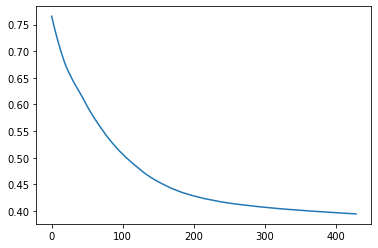

In [ ]:
plt.plot(mlp.loss_curve_)
print(mlp.score(X_test, y_test))

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = mlp.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))


0.8370058110143357
